<a href="https://colab.research.google.com/github/ka1shi/Fake-News-Detection/blob/master/LIAR_DATA_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries used

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
#from numpy import numpy.ndarray.flatten
import os

#nltk.download()
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import np_utils

from keras.layers import Dense, Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model, Sequential
from keras.layers import Concatenate
import time
import math

Using TensorFlow backend.


In [0]:
def load_data(filename):
    """
    
    Load Fake news dataset
    
    Input:
    filename : CSV file that contains data
    
    Output:
    data : Fake news data in pandas dataframe
    """
    
    data = pd.read_csv(filename, sep='\t')
    
    return data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Load data

#filename1 = '/home/charmi/Documents/Fake_news_detection/Nikita_Gupta/LIAR_PLUS_data/train'
#filename2 = '/home/charmi/Documents/Fake_news_detection/Nikita_Gupta/LIAR_PLUS_data/test'
#filename3 = '/home/charmi/Documents/Fake_news_detection/Nikita_Gupta/LIAR_PLUS_data/val'

filename1 = '/content/drive/My Drive/LIAR_PLUS_data/train'
filename2 = '/content/drive/My Drive/LIAR_PLUS_data/test'
filename3 = '/content/drive/My Drive/LIAR_PLUS_data/val'

data_train = load_data(filename1)
data_test = load_data(filename2)
data_val = load_data(filename3)

print(data_train.shape)
print(data_test.shape)
print(data_val.shape)



(10240, 15)
(1267, 15)
(1284, 15)


In [0]:
data_train.apply(lambda x: sum(x.isnull()), axis=0)

ID                  0
Label               0
Statement           0
Subject             2
Speaker             2
Job              2897
Location         2208
Party               2
BT                  2
F                   2
HT                  2
MT                  2
POF                 2
Context           102
Justification      84
dtype: int64

In [0]:
# Combining all data

frame = [data_train, data_test, data_val]
data = pd.concat(frame)

data = sklearn.utils.shuffle(data)
data.reset_index(inplace=True, drop=True) 

data.to_csv('Liar_plus_data_final.csv')

print(data.shape)

data.head()

(12791, 15)


,ID,Label,Statement,Subject,Speaker,Job,Location,Party,BT,F,HT,MT,POF,Context,Justification
0,5171.json,false,Says an Obama administration policy prohibits ...,"marriage,poverty",rick-santorum,NaN,Pennsylvania,republican,12.0,16.0,13.0,7.0,5.0,a debate in South Carolina,Santorum said the Obama administration is not ...
1,13147.json,barely-true,Not one illness has been reported from raw mil...,"corrections-and-updates,food-safety,public-health",dan-flynn,State Representative,Texas,republican,1.0,0.0,0.0,0.0,1.0,a letter to state health officials,"Obama said women ""make 77 cents for every doll..."
2,7465.json,mostly-true,Says a majority of Americans -- and Republican...,"federal-budget,polls,taxes",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press briefing at the White House,"Bloom said, ""Americans are 20 times as likely ..."
3,4798.json,false,Says the state auditor found that 37 percent o...,education,michael-doherty,NaN,NaN,republican,1.0,3.0,1.0,1.0,0.0,a speech before the East Jersey Tea Party,"Graham said, ""The labor participation rate is ..."
4,11597.json,barely-true,There is currently no ability to vet these peo...,"foreign-policy,homeland-security,immigration,t...",ben-carson,NaN,NaN,republican,7.0,12.0,3.0,2.0,4.0,an official statement posted on Facebook.,"Clinton said Sanders ""has been largely a very ..."


In [0]:
data.describe()

,BT,F,HT,MT,POF
count,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000
mean,11.583939,13.359059,17.185785,16.497850,6.251388
std,18.978037,24.140086,35.847678,36.165276,16.180777
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,15.000000,13.000000,12.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


In [0]:
#graph between labels how many of each presnt and also betwwn these values

In [0]:
data.apply(lambda x: sum(x.isnull()), axis=0)

ID                  0
Label               0
Statement           0
Subject             2
Speaker             2
Job              3567
Location         2749
Party               2
BT                  2
F                   2
HT                  2
MT                  2
POF                 2
Context           131
Justification      97
dtype: int64

In [0]:
print(data[data['F'].isnull()])

              ID  ...                                      Justification
623     638.json  ...  Perry says Paine wrote that the duty of a patr...
10731  1626.json  ...  Bill Clinton said, "As secretary of state, (Hi...

[2 rows x 15 columns]


In [0]:
# Deleting rows which have barely-true, false, half-true, mostly-true and pants-on-fire are all null 
# and even other information is missing.

data = data[data.ID != '638.json']
data = data[data.ID != '1626.json']


In [0]:
#Checking

print(data[data['F'].isnull()])

Empty DataFrame
Columns: [ID, Label, Statement, Subject, Speaker, Job, Location, Party, BT, F, HT, MT, POF, Context, Justification]
Index: []


In [0]:
data.shape

(12789, 15)

In [0]:
data.apply(lambda x: sum(x.isnull()), axis=0)

ID                  0
Label               0
Statement           0
Subject             0
Speaker             0
Job              3565
Location         2747
Party               0
BT                  0
F                   0
HT                  0
MT                  0
POF                 0
Context           129
Justification      97
dtype: int64

In [0]:
#checking rows where all four of job, location, justification and context is missing

t1 = data[data['Justification'].isnull()]
t2 = t1[t1['Context'].isnull()]
t3 = t1[t1['Location'].isnull()]
t4 = t3[t3['Job'].isnull()]

t5 = t4[t4['Context'].isnull()]

#print(t2)
#print(t3)
print(t4.shape)

# t4 represent 17 rows where Job, Location and Justification information is missing.
#print(t5)

(17, 15)


In [0]:
data['Speaker'].nunique()

3309

In [0]:
data.dtypes

ID                object
Label             object
Statement         object
Subject           object
Speaker           object
Job               object
Location          object
Party             object
BT               float64
F                float64
HT               float64
MT               float64
POF              float64
Context           object
Justification     object
dtype: object

In [0]:
data['ID'] = data['ID'].astype('str')

In [0]:
data.dtypes

ID                object
Label             object
Statement         object
Subject           object
Speaker           object
Job               object
Location          object
Party             object
BT               float64
F                float64
HT               float64
MT               float64
POF              float64
Context           object
Justification     object
dtype: object

In [0]:
temp = data['ID'].str.split(".", n = 1, expand = True) 
#print(temp)

data['ID'] = temp[0]
data.head()

,ID,Label,Statement,Subject,Speaker,Job,Location,Party,BT,F,HT,MT,POF,Context,Justification
0,5171,false,Says an Obama administration policy prohibits ...,"marriage,poverty",rick-santorum,NaN,Pennsylvania,republican,12.0,16.0,13.0,7.0,5.0,a debate in South Carolina,Santorum said the Obama administration is not ...
1,13147,barely-true,Not one illness has been reported from raw mil...,"corrections-and-updates,food-safety,public-health",dan-flynn,State Representative,Texas,republican,1.0,0.0,0.0,0.0,1.0,a letter to state health officials,"Obama said women ""make 77 cents for every doll..."
2,7465,mostly-true,Says a majority of Americans -- and Republican...,"federal-budget,polls,taxes",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press briefing at the White House,"Bloom said, ""Americans are 20 times as likely ..."
3,4798,false,Says the state auditor found that 37 percent o...,education,michael-doherty,NaN,NaN,republican,1.0,3.0,1.0,1.0,0.0,a speech before the East Jersey Tea Party,"Graham said, ""The labor participation rate is ..."
4,11597,barely-true,There is currently no ability to vet these peo...,"foreign-policy,homeland-security,immigration,t...",ben-carson,NaN,NaN,republican,7.0,12.0,3.0,2.0,4.0,an official statement posted on Facebook.,"Clinton said Sanders ""has been largely a very ..."


In [0]:
data.shape[-1]

15

In [0]:
#Data cleaning, removing all special chararcters 
#from statement subject speaker job location party context and justification

#remove all characters which are not A-Z,a-z or 0-9

def data_clean(data, field):
    data[field] = data[field].str.replace(r"@\S+", "")
    data[field] = data[field].str.replace(r"[^A-Za-z0-9]", " ")
    data[field] = data[field].str.replace(r"(),!?@\'\`\"\_\n", " ")
    data[field] = data[field].str.replace(r"@", "at")
    data[field] = data[field].str.replace(r"http\S+", "")
    data[field] = data[field].str.replace(r"http", "")
    data[field] = data[field].str.lower()
    return data

data = data_clean(data, "Statement")
data = data_clean(data, "Subject")
data = data_clean(data, "Job")
data = data_clean(data, "Location")
data = data_clean(data, "Party")
data = data_clean(data, "Context")
data = data_clean(data, "Justification")

#Saved clean data files
data.to_csv("clean_LIAR_PLUS_data.csv")

#checking
data.head()

,ID,Label,Statement,Subject,Speaker,Job,Location,Party,BT,F,HT,MT,POF,Context,Justification
0,5171,false,says an obama administration policy prohibits ...,marriage poverty,rick-santorum,NaN,pennsylvania,republican,12.0,16.0,13.0,7.0,5.0,a debate in south carolina,santorum said the obama administration is not ...
1,13147,barely-true,not one illness has been reported from raw mil...,corrections and updates food safety public health,dan-flynn,state representative,texas,republican,1.0,0.0,0.0,0.0,1.0,a letter to state health officials,obama said women make 77 cents for every doll...
2,7465,mostly-true,says a majority of americans and republican...,federal budget polls taxes,barack-obama,president,illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press briefing at the white house,bloom said americans are 20 times as likely ...
3,4798,false,says the state auditor found that 37 percent o...,education,michael-doherty,NaN,NaN,republican,1.0,3.0,1.0,1.0,0.0,a speech before the east jersey tea party,graham said the labor participation rate is ...
4,11597,barely-true,there is currently no ability to vet these peo...,foreign policy homeland security immigration t...,ben-carson,NaN,NaN,republican,7.0,12.0,3.0,2.0,4.0,an official statement posted on facebook,clinton said sanders has been largely a very ...


In [0]:
#join all columns with text field 
temp = ['Statement', 'Subject', 'Speaker','Job', 'Location', 'Party', 'Context', 'Justification']

#training data
data_temp = data[temp]

data['Full_Statement'] = data_temp.apply(lambda x: ' '.join(x.map(str)), axis=1)
data.head()

,ID,Label,Statement,Subject,Speaker,Job,Location,Party,BT,F,HT,MT,POF,Context,Justification,Full_Statement
0,5171,false,says an obama administration policy prohibits ...,marriage poverty,rick-santorum,NaN,pennsylvania,republican,12.0,16.0,13.0,7.0,5.0,a debate in south carolina,santorum said the obama administration is not ...,says an obama administration policy prohibits ...
1,13147,barely-true,not one illness has been reported from raw mil...,corrections and updates food safety public health,dan-flynn,state representative,texas,republican,1.0,0.0,0.0,0.0,1.0,a letter to state health officials,obama said women make 77 cents for every doll...,not one illness has been reported from raw mil...
2,7465,mostly-true,says a majority of americans and republican...,federal budget polls taxes,barack-obama,president,illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press briefing at the white house,bloom said americans are 20 times as likely ...,says a majority of americans and republican...
3,4798,false,says the state auditor found that 37 percent o...,education,michael-doherty,NaN,NaN,republican,1.0,3.0,1.0,1.0,0.0,a speech before the east jersey tea party,graham said the labor participation rate is ...,says the state auditor found that 37 percent o...
4,11597,barely-true,there is currently no ability to vet these peo...,foreign policy homeland security immigration t...,ben-carson,NaN,NaN,republican,7.0,12.0,3.0,2.0,4.0,an official statement posted on facebook,clinton said sanders has been largely a very ...,there is currently no ability to vet these peo...


In [0]:
# Drop all columns which we have combined earlier

#Created new dataset with data_final
data_final = data.copy()
data_final = data.drop(temp, axis=1)

In [0]:
#Checking

data_final['Full_Statement'][0]

'says an obama administration policy prohibits people who work with at risk youth from promoting marriage as a way to avoid poverty  marriage poverty rick-santorum nan pennsylvania republican a debate in south carolina santorum said the obama administration is not allowing people who work with at risk adolescents to promote the benefits of marriage  santorum said he had heard this from elayne bennett of the best friends foundation  but she told us he misspoke  the change under obama  according to bennett  was about what could be taught regarding abstinence    not marriage  the department of health and human services said there was confusion in this area  so it clarified the policy  which does allow discussion of abstinence in other contexts but not as a stand alone education program '

In [0]:
data.head()

,ID,Label,Statement,Subject,Speaker,Job,Location,Party,BT,F,HT,MT,POF,Context,Justification,Full_Statement
0,5171,false,says an obama administration policy prohibits ...,marriage poverty,rick-santorum,NaN,pennsylvania,republican,12.0,16.0,13.0,7.0,5.0,a debate in south carolina,santorum said the obama administration is not ...,says an obama administration policy prohibits ...
1,13147,barely-true,not one illness has been reported from raw mil...,corrections and updates food safety public health,dan-flynn,state representative,texas,republican,1.0,0.0,0.0,0.0,1.0,a letter to state health officials,obama said women make 77 cents for every doll...,not one illness has been reported from raw mil...
2,7465,mostly-true,says a majority of americans and republican...,federal budget polls taxes,barack-obama,president,illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press briefing at the white house,bloom said americans are 20 times as likely ...,says a majority of americans and republican...
3,4798,false,says the state auditor found that 37 percent o...,education,michael-doherty,NaN,NaN,republican,1.0,3.0,1.0,1.0,0.0,a speech before the east jersey tea party,graham said the labor participation rate is ...,says the state auditor found that 37 percent o...
4,11597,barely-true,there is currently no ability to vet these peo...,foreign policy homeland security immigration t...,ben-carson,NaN,NaN,republican,7.0,12.0,3.0,2.0,4.0,an official statement posted on facebook,clinton said sanders has been largely a very ...,there is currently no ability to vet these peo...


In [0]:
#Separate paragraph to words(tokens)

tokenizer = RegexpTokenizer(r'\w+')

data_final["tokens"] = data_final["Full_Statement"].apply(tokenizer.tokenize)

#checking tokens
print(data_final.shape)
data_final.head(5)


(12789, 9)


,ID,Label,BT,F,HT,MT,POF,Full_Statement,tokens
0,5171,false,12.0,16.0,13.0,7.0,5.0,says an obama administration policy prohibits ...,"[says, an, obama, administration, policy, proh..."
1,13147,barely-true,1.0,0.0,0.0,0.0,1.0,not one illness has been reported from raw mil...,"[not, one, illness, has, been, reported, from,..."
2,7465,mostly-true,70.0,71.0,160.0,163.0,9.0,says a majority of americans and republican...,"[says, a, majority, of, americans, and, republ..."
3,4798,false,1.0,3.0,1.0,1.0,0.0,says the state auditor found that 37 percent o...,"[says, the, state, auditor, found, that, 37, p..."
4,11597,barely-true,7.0,12.0,3.0,2.0,4.0,there is currently no ability to vet these peo...,"[there, is, currently, no, ability, to, vet, t..."


In [0]:
data_before = data_final.copy()

columns = ['ID', 'BT', 'F', 'HT', 'MT', 'POF', 'Full_Statement']
data_final.drop(columns, axis=1, inplace=True)

data_final.head()

,Label,tokens
0,false,"[says, an, obama, administration, policy, proh..."
1,barely-true,"[not, one, illness, has, been, reported, from,..."
2,mostly-true,"[says, a, majority, of, americans, and, republ..."
3,false,"[says, the, state, auditor, found, that, 37, p..."
4,barely-true,"[there, is, currently, no, ability, to, vet, t..."


In [0]:
#checking vocab size in data_final

all_words = [word for tokens in data_final["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data_final["tokens"]]
DATA_VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(DATA_VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1343547 words total, with a vocabulary size of 28470
Max sentence length is 1398


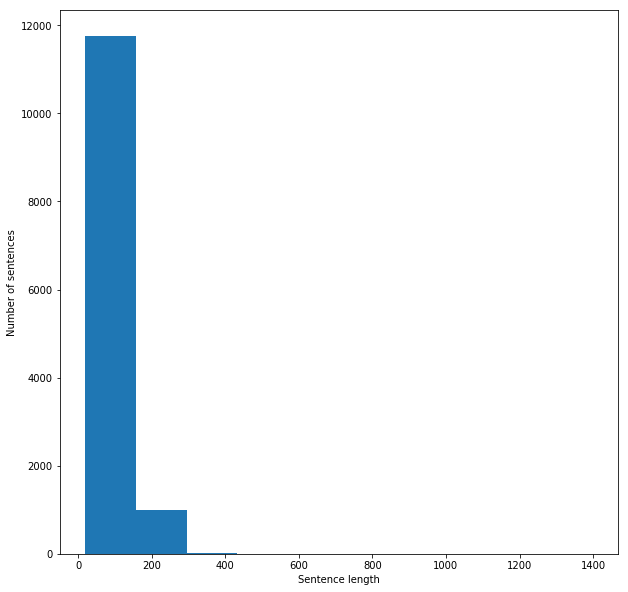

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [0]:
# convert categorical labels to numerical with one hot encoding

data_label = data_final["Label"].tolist()
print(data_label)

encoder = LabelEncoder()
encoder.fit(data_label)
encoded_y = encoder.transform(data_label)
print(encoded_y)
# convert to dummy variables (i.e. one hot encoded)
y_labels = np_utils.to_categorical(encoded_y, 6)

print(y_labels[0:5])

['false', 'barely-true', 'mostly-true', 'false', 'barely-true', 'mostly-true', 'mostly-true', 'false', 'false', 'pants-fire', 'barely-true', 'barely-true', 'barely-true', 'mostly-true', 'false', 'barely-true', 'half-true', 'mostly-true', 'false', 'barely-true', 'true', 'pants-fire', 'mostly-true', 'true', 'half-true', 'half-true', 'barely-true', 'mostly-true', 'mostly-true', 'barely-true', 'pants-fire', 'barely-true', 'true', 'mostly-true', 'false', 'half-true', 'false', 'true', 'false', 'mostly-true', 'barely-true', 'mostly-true', 'half-true', 'false', 'true', 'true', 'barely-true', 'false', 'false', 'true', 'false', 'mostly-true', 'barely-true', 'barely-true', 'true', 'half-true', 'barely-true', 'half-true', 'half-true', 'barely-true', 'barely-true', 'mostly-true', 'true', 'barely-true', 'half-true', 'pants-fire', 'pants-fire', 'false', 'true', 'true', 'half-true', 'pants-fire', 'pants-fire', 'false', 'barely-true', 'barely-true', 'half-true', 'false', 'false', 'half-true', 'barely-t

In [0]:
#data_final['Label'] = data_label
#data_final.head()

In [0]:
import gensim

word2vec_path = "/content/drive/My Drive/GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
def get_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(word2vec, data_final, generate_missing=False):
    embeddings = data_final['tokens'].apply(lambda x: get_word2vec(x, word2vec, 
                                                                   generate_missing=generate_missing))
    return list(embeddings)

In [0]:
from sklearn.model_selection import train_test_split
embeddings = get_word2vec_embeddings(word2vec, data_final)

print(embeddings[0])

[ 1.03671551e-02  6.18060678e-03  3.40532064e-02  9.48537439e-02
 -4.41048145e-02 -7.63344765e-03  4.06193733e-02 -5.95107079e-02
  5.48195243e-02  1.50620937e-02 -3.75646353e-02 -1.19006634e-01
 -5.89971542e-02  6.10172749e-02 -9.71250534e-02  8.34730864e-02
  4.64550257e-02  8.25402737e-02 -1.15681589e-02 -5.32743931e-02
  3.08436155e-03  1.38868093e-02  2.92674303e-02 -5.20148128e-03
  2.30498612e-03 -2.49395370e-02 -8.96051526e-02  7.19442368e-02
  2.95877457e-02 -4.31895256e-03 -1.75616629e-02 -2.77493000e-02
 -3.90670300e-02 -1.41235888e-02 -1.08969212e-03 -3.56417894e-03
  6.44063950e-03 -4.61483002e-03  8.02254677e-03  3.56252193e-02
  4.31692600e-02 -4.97174263e-03  6.41517639e-02 -2.24118233e-02
 -5.22142053e-02 -1.72783136e-02 -8.47288966e-03  1.47944465e-02
 -1.82399005e-02  5.09928465e-02  2.39737630e-02  8.96438956e-04
 -1.30532086e-02 -1.93241537e-02  1.43687725e-02  1.46856308e-02
 -8.39313269e-02 -4.81727123e-02  4.75953519e-03 -7.82790780e-02
 -1.19485855e-02  5.58874

In [0]:
#Train-test split
"""print(len(embeddings))

if type(embeddings) is np.ndarray:
  print("True")
else:
  print("False")"""
  
embeddings = np.asarray(embeddings)
"""if type(embeddings) is np.ndarray:
  print("True")
print(embeddings.shape)
 
#embeddings = embeddings.flatten()
dataframe = pd.DataFrame.from_records(embeddings)
print(embeddings.shape)
if type(embeddings) is np.ndarray:
  print("True")"""

encoded_y = encoded_y.tolist()

x_train, x_test, y_train, y_test = train_test_split(embeddings, encoded_y, 
                                                    test_size=0.2, random_state=13)


In [0]:
print(x_train.shape)
print(x_test.shape)

(10231, 300)
(2558, 300)


In [0]:
"""def Model(embedded_dim, activation_function, loss_function, optimizer):
  
  model = Sequential()
  model.add(Embedding(1, embedded_dim ,input_length = x_train.shape[-1], dropout=0.2))
  model.add(Bidirectional(LSTM(32)))
  model.add(Dense(units=6))
  model.add(Activation(activation_function))
  model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
    
  return model"""

"def Model(embedded_dim, activation_function, loss_function, optimizer):\n  \n  model = Sequential()\n  model.add(Embedding(1, embedded_dim ,input_length = x_train.shape[-1], dropout=0.2))\n  model.add(Bidirectional(LSTM(32)))\n  model.add(Dense(units=6))\n  model.add(Activation(activation_function))\n  model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])\n    \n  return model"

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=13)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [0]:
#model = Model(300, 'softmax', 'categorical_crossentropy', 'adam')
#print (model.summary())

In [0]:
"""start = time.time()

model.fit(x_train, y_train, batch_size = 10, epochs=5, validation_split = 0.13)

training_time = int(math.floor(time.time()-start))

print("Training Time :", training_time,"seconds")"""

'start = time.time()\n\nmodel.fit(x_train, y_train, batch_size = 10, epochs=5, validation_split = 0.13)\n\ntraining_time = int(math.floor(time.time()-start))\n\nprint("Training Time :", training_time,"seconds")'

In [0]:
 #y_predict = model.predict(x_test)

In [0]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [0]:
accuracy, precision, recall, F1 = get_metrics(y_test, y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, F1 = %.3f" % (accuracy, precision, 
                                                                       recall, F1))

accuracy = 0.212, precision = 0.212, recall = 0.212, F1 = 0.207


In [0]:
    """fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title("---------")
    plt.plot(y_predict, color = 'green', label = 'Predicted Price')
    plt.plot(y_test, color = 'red', label = 'Actual Price')
    ax.set_ylabel("labels")
    ax.set_xlabel("-------")
    ax.legend()
    plt.show()"""
    

'fig = plt.figure(figsize=(10,5))\nax = fig.add_subplot(111)\nax.set_title("---------")\nplt.plot(y_predict, color = \'green\', label = \'Predicted Price\')\nplt.plot(y_test, color = \'red\', label = \'Actual Price\')\nax.set_ylabel("labels")\nax.set_xlabel("-------")\nax.legend()\nplt.show()'

In [0]:
print(y_test[0:4])
print(y_predict[0:4])

[3, 5, 2, 2]
[3 0 4 0]


In [0]:
x_test[0]

array([ 1.04665205e-02, -4.39580807e-03,  4.46910070e-02,  6.06108106e-02,
       -4.10764079e-02, -2.01631656e-02,  3.76385145e-02, -7.03532321e-02,
        6.52516263e-02,  4.75371810e-02, -6.07650379e-02, -5.71193222e-02,
       -1.54840138e-02,  1.19558287e-02, -7.97066964e-02,  5.06093679e-02,
        2.73250233e-02,  6.68070139e-02, -2.19973730e-02, -2.89389870e-02,
       -6.15370254e-02,  2.15725229e-02,  1.31528240e-02, -1.87949188e-02,
       -3.84395379e-03, -2.72772923e-03, -9.65097601e-02,  6.43558975e-02,
        5.36409488e-03,  1.45509263e-02,  9.88329344e-03, -1.47435212e-02,
       -4.42454677e-02, -9.32390828e-03,  2.45496261e-03, -6.19450877e-03,
       -1.74642516e-02,  1.31021295e-02,  1.63472704e-02,  4.62169805e-02,
        6.25602785e-02, -2.32311911e-02,  5.34185614e-02,  1.32989174e-02,
       -2.36247039e-02, -4.38528140e-02, -1.55819980e-02,  7.69518230e-03,
       -2.94169907e-02, -8.36459073e-04,  1.96934219e-02,  2.99412751e-03,
       -6.19242014e-03, -